In [1]:
import os
import sys
import json
import time
import requests
from bs4 import BeautifulSoup
import re
import urllib.request
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt 
from matplotlib import font_manager, rc
import seaborn as sns 
sns.set_style("darkgrid")
%matplotlib inline 
rc("font", family="Malgun Gothic")
plt.rcParams["axes.unicode_minus"] = False 

import warnings
warnings.filterwarnings(action='ignore')

# 문제 1) 프로그래밍 언어 관련 책 정보 가져오기

In [2]:
lang_top_20 = ['Python', 'C', 'Java', 'C++', 'C#', 'Visual Basic', 'Javascript', 'SQL', 'PHP',
               'Assembly language', 'Classic Visual Basic', 'Go', 'MATLAB', 'Groovy', 'Ruby', 'Swift',
               'Fortran', 'Perl', 'Delphi/Object Pascal',
              "파이썬", 'C언어', 'C 언어', '자바', '비주얼 베이직', '자바스크립트', 'R 언어', "R Programming", 'R 프로그래밍',
              '어셈블리 언어', '어셈블리어', '클래식 비주얼 베이직', '고 언어', 'Go언어', '매트랩']

In [3]:
client_id = " "
client_pw = " "

In [4]:
def gen_search_url(api_node, search_text, start_num, disp_num):
    base = "https://openapi.naver.com/v1/search"
    node = "/" + api_node + ".json"
    param_query = "?query=" + urllib.parse.quote(search_text)
    param_start = "&start=" + str(start_num)
    param_disp = "&display=" + str(disp_num)
    
    return base + node + param_query + param_start + param_disp

In [5]:
def get_result_onpage(url):
    global client_id
    global client_pw
    request = urllib.request.Request(url)
    request.add_header("X-Naver-Client-Id", client_id)
    request.add_header("X-Naver-Client-Secret", client_pw)
    response = urllib.request.urlopen(request)
    print("[%s] Url Request Success" % datetime.datetime.now())
    return json.loads(response.read().decode("utf-8"))

In [6]:
def delete_tag(input_str):
    input_str = input_str.replace("<b>", "")
    input_str = input_str.replace("</b>", "")
    return input_str 

In [7]:
def get_fields(json_data, _keyword):
    title = [delete_tag(each["title"]) for each in json_data["items"]]
    link = [each["link"] for each in json_data["items"]]
    author = [each["author"] for each in json_data["items"]]
    price = [each["price"] for each in json_data["items"]]
    discount = [each["discount"] for each in json_data["items"]]
    publisher = [delete_tag(each["publisher"]) for each in json_data["items"]]
    pubdate = [each["pubdate"] for each in json_data["items"]]
    isbn = [each["isbn"] for each in json_data["items"]]
    description = [delete_tag(each["description"]) for each in json_data["items"]]
    
    result_pd = pd.DataFrame({
        "keyword" : [_keyword] * len(title),
        "title": title, 
        "link": link, 
        "author": author, 
        "price": price,
        "discount" : discount,
        "publisher" : publisher,
        "pubdate" : pubdate,
        "isbn" : isbn,
        "description" : description,
    }, columns=["keyword", "title", "link", "author", "price", "discount", "publisher", "pubdate", "isbn", "description"])
    return result_pd

In [8]:
###
df_books = pd.DataFrame(columns=["keyword", "title", "link", "author", "price", "discount", "publisher", "pubdate", "isbn", "description"])
for _text in lang_top_20:
    tmp_li = []
    for i in range(1, 1000, 100):
        url = gen_search_url("book", _text, i, 100)
        json_result = get_result_onpage(url)
        pd_result = get_fields(json_result, _text)
        tmp_li.append(pd_result)
        time.sleep(0.001)
    df_books = df_books.append(pd.concat(tmp_li))

[2021-10-21 13:06:24.594432] Url Request Success
[2021-10-21 13:06:25.048875] Url Request Success
[2021-10-21 13:06:25.526307] Url Request Success
[2021-10-21 13:06:26.003645] Url Request Success
[2021-10-21 13:06:26.489386] Url Request Success
[2021-10-21 13:06:26.991416] Url Request Success
[2021-10-21 13:06:27.459045] Url Request Success
[2021-10-21 13:06:27.931546] Url Request Success
[2021-10-21 13:06:28.419936] Url Request Success
[2021-10-21 13:06:28.872946] Url Request Success
[2021-10-21 13:06:29.333933] Url Request Success
[2021-10-21 13:06:29.800608] Url Request Success
[2021-10-21 13:06:30.266176] Url Request Success
[2021-10-21 13:06:30.752516] Url Request Success
[2021-10-21 13:06:31.242556] Url Request Success
[2021-10-21 13:06:31.728246] Url Request Success
[2021-10-21 13:06:32.202526] Url Request Success
[2021-10-21 13:06:32.676982] Url Request Success
[2021-10-21 13:06:33.199596] Url Request Success
[2021-10-21 13:06:33.707085] Url Request Success
[2021-10-21 13:06:34

[2021-10-21 13:07:32.259733] Url Request Success
[2021-10-21 13:07:32.694277] Url Request Success
[2021-10-21 13:07:33.083138] Url Request Success
[2021-10-21 13:07:33.521501] Url Request Success
[2021-10-21 13:07:33.834702] Url Request Success
[2021-10-21 13:07:34.127926] Url Request Success
[2021-10-21 13:07:34.434252] Url Request Success
[2021-10-21 13:07:34.801747] Url Request Success
[2021-10-21 13:07:35.121977] Url Request Success
[2021-10-21 13:07:35.428820] Url Request Success
[2021-10-21 13:07:35.894649] Url Request Success
[2021-10-21 13:07:36.358430] Url Request Success
[2021-10-21 13:07:36.621363] Url Request Success
[2021-10-21 13:07:36.767135] Url Request Success
[2021-10-21 13:07:36.924458] Url Request Success
[2021-10-21 13:07:37.062368] Url Request Success
[2021-10-21 13:07:37.191116] Url Request Success
[2021-10-21 13:07:37.316415] Url Request Success
[2021-10-21 13:07:37.439652] Url Request Success
[2021-10-21 13:07:37.586012] Url Request Success
[2021-10-21 13:07:37

[2021-10-21 13:08:31.999802] Url Request Success
[2021-10-21 13:08:32.111102] Url Request Success
[2021-10-21 13:08:32.236679] Url Request Success
[2021-10-21 13:08:32.374287] Url Request Success


In [9]:
df_books['keyword'].unique()

array(['Python', 'C', 'Java', 'C++', 'C#', 'Visual Basic', 'Javascript',
       'SQL', 'PHP', 'Assembly language', 'Classic Visual Basic', 'Go',
       'MATLAB', 'Groovy', 'Ruby', 'Swift', 'Fortran', 'Perl',
       'Delphi/Object Pascal', '파이썬', 'C언어', 'C 언어', '자바', '비주얼 베이직',
       '자바스크립트', 'R 언어', 'R Programming', 'R 프로그래밍', '어셈블리 언어', '어셈블리어',
       '클래식 비주얼 베이직', '고 언어', 'Go언어', '매트랩'], dtype=object)

In [10]:
df_books.to_excel('df_books.xlsx', index=None)

In [2]:
df = pd.read_excel("./df_books.xlsx")
print(len(df))
df.tail(3)

28728


,keyword,title,link,author,price,discount,publisher,pubdate,isbn,description
28725,매트랩,공학도를 위한 알기쉬운 수치해석,http://book.naver.com/bookdb/book_detail.php?b...,백태현,18000.0,NaN,청문각,20070228,8992592124 9788992592123,"수치해석 입문서. 이 책은 전자계산기와 수치해석의 개념, 매트랩 기초와 비선형 방정..."
28726,매트랩,알기쉬운 선형대수학,http://book.naver.com/bookdb/book_detail.php?b...,이광연,18000.0,NaN,경문사,20040810,8972827088 9788972827085,선형대수학 교재. 수학전공자들을 위해 이론과 설명을 정리하였다.
28727,매트랩,공학 수치해석 (MATLAB으로 배우는),http://book.naver.com/bookdb/book_detail.php?b...,방성완,23000.0,NaN,한빛미디어,20121207,8979149859 9788979149852,"MATLAB으로 배우는 『공학 수치해석』. 수치해석의 기본 공식, 방법과 기술 등의..."


In [3]:
# description 없는 항목 제거
df = df.dropna(subset=['description'])

# keyword 통일
df.loc[df['keyword']=="파이썬", "keyword"] = "Python"
df.loc[df['keyword'].isin(["C언어", 'C 언어']), "keyword"] = "C"
df.loc[df['keyword'].isin(["자바"]), "keyword"] = "Java"
df.loc[df['keyword'].isin(["비주얼 베이직"]), "keyword"] = "Visual Basic"
df.loc[df['keyword'].isin(["자바스크립트"]), "keyword"] = "Javascript"
df.loc[df['keyword'].isin(["R 언어", "R 프로그래밍", "R Programming"]), "keyword"] = "R"
df.loc[df['keyword'].isin(["어셈블리 언어", '어셈블리어']), "keyword"] = "Assembly language"
df.loc[df['keyword'].isin(["클래식 비주얼 베이직"]), "keyword"] = 'Classic Visual Basic'
df.loc[df['keyword'].isin(["고 언어", 'Go언어']), "keyword"] = 'Go'
df.loc[df['keyword'].isin(["매트랩"]), "keyword"] = 'MATLAB'

In [4]:
len(df)

22488

In [5]:
df = df.reset_index(drop=True)

In [6]:
lang_top_20 = ['Python', 'C', 'Java', 'C++', 'C#', 'Visual Basic', 'Javascript', 'SQL', 'PHP',
               'Assembly language', 'Classic Visual Basic', 'Go', 'MATLAB', 'R', 'Groovy', 'Ruby', 'Swift',
               'Fortran', 'Perl', 'Delphi/Object Pascal']

lang_top_20_incl = {'Python': ['python', '파이썬', 'programming'],
                  'C' : ['프로그래밍', "programming", 'c언어', 'c 언어'],
                  'Java' : ['자바', 'java'],
                   'C++':['c++'],
                   'C#' : ['c#'],
                   'Visual Basic':['visual basic', '비주얼 베이직', 'vba'],
                   'Javascript':["script", '자바스크립트'],
                   'SQL':['sql'],
                   'PHP':['php'],
                    'Assembly language' : ['어셈블리어', 'assembly', '어셈블리'],
                    'Classic Visual Basic' : ['classic'],
                    'Go' : ['go 언어', 'go언어'],
                    'MATLAB' : ['matlab', '매트랩'],
                    'R': ['r프로그래밍', '통계', 'r 언어', 'r언어', ' r ','rstudio', 'r을', 'r과','r로', 'r Programming'],
                    'Groovy' : ['groovy'],
                    'Ruby': ['ruby', '루비'],
                    'Swift' : ['swift'],
                   'Fortran' : ['fortran', '포트란'],
                    'Perl' : ['perl'],
                    'Delphi/Object Pascal' : ['delphi', '델파이']}

lang_top_20_excl = {'Python': [],
                  'C' : [],
                  'Java' : ['script', '스크립트'],
                   'C++':[],
                   'C#' : [],
                   'Visual Basic':['classic'],
                   'Javascript':[],
                   'SQL':[],
                   'PHP':[],
                    'Assembly language' : [],
                    'Classic Visual Basic' : [],
                    'Go' : [],
                    'MATLAB' : [],
                    'R': [],
                    'Groovy' : [],
                    'Ruby': [],
                    'Swift' : [],
                   'Fortran' : [],
                    'Perl' : [],
                    'Delphi/Object Pascal' : []}

In [7]:
del_list = []
for idx, rows in df.iterrows():
    del_flag = True
    _title = str(rows['title']).lower()
    _desc = str(rows['description']).lower()
    for w in lang_top_20_incl[rows['keyword']]:
        if (w in _desc) or (w in _title):
            del_flag = False
            break
    for w in lang_top_20_excl[rows['keyword']]:
        if (w in _desc) or (w in _title):
            del_flag = True
            break
    if del_flag == True:
        del_list.append(idx)
        # print(rows)

In [8]:
df.loc[del_list].to_excel('a.xlsx')
df.drop(del_list).to_excel('b.xlsx')

###  ISBN 정보를 unique 검사 후 중복 데이터 제거

In [9]:
print('df length:\t{}'.format(len(df)))

df length:	22488


In [10]:
print('df length:\t\t{}'.format(len(df)))
print('unuque isbn num:\t{}'.format(df['isbn'].nunique()))

df length:		22488
unuque isbn num:	19392


In [11]:
df_uni = df.drop_duplicates(subset=["isbn"], keep='first')
len(df_uni)

19393

# 책 페이지 수 수집

In [53]:
df_uni['pagecnt'] = np.nan

In [54]:
for idx, rows in df_uni.iterrows():
    url = rows['link']
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")
    tag  = soup.select('#container > div.spot > div.book_info > div.book_info_inner > div:nth-child(3)')
    if tag == None:
        print(idx, ' -None')
        continue
    try:
        page_cnt = re.search('<em>페이지</em>.*?<', str(tag), re.I|re.S).group(0)
        page_cnt = re.search(r'[0-9]+', str(page_cnt), re.I|re.S)
        page_cnt = int(page_cnt.group(0))
        df_uni.loc[idx,'pagecnt'] = page_cnt
    except:
        continue
    if idx % 500 == 0:
        print(idx)

0
500
1000
2000
2500
3000
3500
4000
4500
5000
6000
6500
7500
8000
8500
9000
9500
10000
10500
11000
11500
12000
12500
13000
14000
18000
18500
20500
21000
21500
22000


In [63]:
df_uni.dropna(subset=['pagecnt']).to_excel('pagecnt.xlsx', index=None)

In [224]:
df_pagecnt = pd.read_excel("./pagecnt.xlsx")
df_pagecnt = df_pagecnt.dropna(subset=['price'])
df_pagecnt = df_pagecnt.reset_index(drop=True)

In [225]:
df_pagecnt.head(2)

,keyword,title,link,author,price,discount,publisher,pubdate,isbn,description,pagecnt
0,Python,Effective Python 2nd 이펙티브 파이썬 : 파이썬 코딩의 기술 (똑똑...,http://book.naver.com/bookdb/book_detail.php?b...,브렛 슬라킨 지음|오현석,32000.0,28800.0,길벗,20201030,1165213192 9791165213190,"아마존 파이썬 프로그래밍 분야 베스트셀러, 〈Effective Python〉 전면 ...",640
1,Python,파이썬 딥러닝 파이토치(Python Deep Learning PyTorch),http://book.naver.com/bookdb/book_detail.php?b...,이경택|방성수|안상준,25000.0,22500.0,정보문화사,20201008,8956748578 9788956748573,파이썬은 선택이 아닌 필수! 파이토치로 딥러닝 입문하기!이 책은 딥러닝 기술에 초점...,310


## 각 언어별 IQR 넘는 이상치 제거
### page수, price

In [226]:
df_pagecnt_iqr = pd.DataFrame(columns=['keyword','title','link','author','price','discount','publisher',
 'pubdate','isbn','description','pagecnt'])
df_pagecnt_iqr['pagecnt'] = df_pagecnt_iqr['pagecnt'].astype(int)
df_pagecnt_iqr['price'] = df_pagecnt_iqr['price'].astype(int)

In [227]:
lang_top_20 = ['Python', 'C', 'Java', 'C++', 'C#', 'Visual Basic', 'Javascript', 'SQL', 'PHP',
               'Assembly language', 'Classic Visual Basic', 'Go', 'MATLAB', 'R', 'Groovy', 'Ruby', 'Swift',
               'Fortran', 'Perl', 'Delphi/Object Pascal']

In [228]:
for key in lang_top_20:
    df_tmp = df_pagecnt.loc[df_pagecnt['keyword'] == key]
    if len(df_tmp) == 0:
        continue
    pg_quartile_1, pg_quartile_3 = np.percentile(df_tmp['pagecnt'], [25, 75])
    pg_iqr = pg_quartile_3 - pg_quartile_1
    pg_lower_bound = pg_quartile_1 - (pg_iqr * 1.5)
    pg_upper_bound = pg_quartile_3 + (pg_iqr * 1.5)
    
    pr_quartile_1, pr_quartile_3 = np.percentile(df_tmp['price'], [25, 75])
    pr_iqr = pr_quartile_3 - pr_quartile_1
    pr_lower_bound = pr_quartile_1 - (pr_iqr * 1.5)
    pr_upper_bound = pr_quartile_3 + (pr_iqr * 1.5)
    
    df_tmp = df_tmp.loc[(df_tmp['pagecnt']  >= pg_lower_bound) & (df_tmp['pagecnt'] <= pg_upper_bound) &
                       (df_tmp['price']  >= pr_lower_bound) & (df_tmp['price'] <= pr_upper_bound)]
    df_pagecnt_iqr = df_pagecnt_iqr.append(df_tmp)

In [229]:
df_pagecnt_iqr = df_pagecnt_iqr.reset_index(drop=True)

- 언어별 책의 가격은 어떤 특성이 있나요?
- 언어별 페이지수도 어떤 특성이 있나요?
- 페이지 수와 가격 사이에는 어떤 특성이 있나요?

In [230]:
for key in lang_top_20:
    print('{0} 언어 서적 page 평균 >>>       {1:.1f}'.format(key, 
                                               df_pagecnt_iqr.loc[df_pagecnt_iqr['keyword']== key, 'pagecnt'].mean()))

Python 언어 서적 page 평균 >>>       292.5
C 언어 서적 page 평균 >>>       295.9
Java 언어 서적 page 평균 >>>       465.7
C++ 언어 서적 page 평균 >>>       519.0
C# 언어 서적 page 평균 >>>       575.9
Visual Basic 언어 서적 page 평균 >>>       503.9
Javascript 언어 서적 page 평균 >>>       456.2
SQL 언어 서적 page 평균 >>>       470.0
PHP 언어 서적 page 평균 >>>       450.9
Assembly language 언어 서적 page 평균 >>>       454.6
Classic Visual Basic 언어 서적 page 평균 >>>       540.4
Go 언어 서적 page 평균 >>>       192.8
MATLAB 언어 서적 page 평균 >>>       342.8
R 언어 서적 page 평균 >>>       367.6
Groovy 언어 서적 page 평균 >>>       nan
Ruby 언어 서적 page 평균 >>>       205.5
Swift 언어 서적 page 평균 >>>       260.8
Fortran 언어 서적 page 평균 >>>       442.3
Perl 언어 서적 page 평균 >>>       398.4
Delphi/Object Pascal 언어 서적 page 평균 >>>       513.6


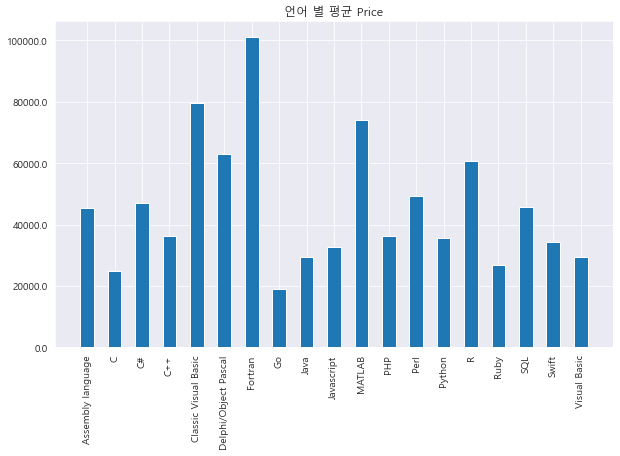

In [238]:
df_plt = df_pagecnt_iqr[['keyword', 'price']].groupby('keyword').mean()

plt.figure(figsize=(10, 6))
plt.title("언어 별 평균 Price")

plt.bar(df_plt.index,
         df_plt['price'],
         width = 0.5)
plt.grid(True)
plt.xticks(rotation=90)
# after plotting the data, format the labels
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.1f}'.format(x) for x in current_values])
    
plt.show()

In [240]:
df_plt.sort_values('price', ascending=False).head()

,price
keyword,
Fortran,101134.626623
Classic Visual Basic,79599.801047
MATLAB,74071.323362
Delphi/Object Pascal,62896.166667
R,60641.776587


- 언어별 서적 평균 가격은 Fortran > Classic VB > Matlab > Delphi > R 순이다

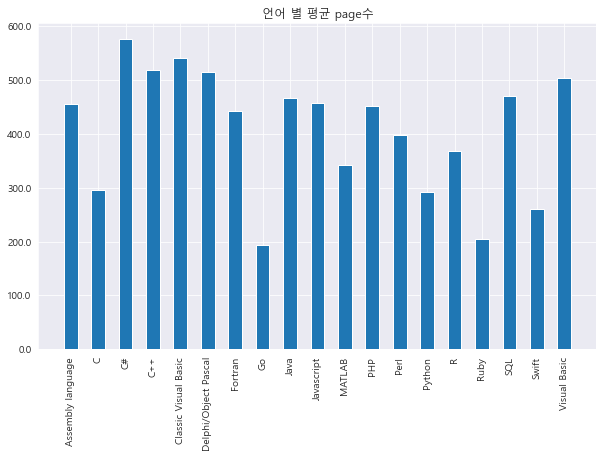

In [241]:
df_plt = df_pagecnt_iqr[['keyword', 'pagecnt']].groupby('keyword').mean()

plt.figure(figsize=(10, 6))
plt.title("언어 별 평균 page수")

plt.bar(df_plt.index,
         df_plt['pagecnt'],
         width = 0.5)
plt.grid(True)
plt.xticks(rotation=90)
# after plotting the data, format the labels
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.1f}'.format(x) for x in current_values])
    
plt.show()

In [242]:
df_plt.sort_values('pagecnt', ascending=False).head()

,pagecnt
keyword,
C#,575.895770
Classic Visual Basic,540.350785
C++,518.955521
Delphi/Object Pascal,513.611111
Visual Basic,503.903454


- 언어별 서적 평균 페이지 수는  C# > Classic VB > C++ > Delphi > VB 순이다
- 일부 언어를 제외하면 각 각 큰 차이는 없는 듯 보인다.

In [257]:
df_pagecnt_iqr[['pagecnt', 'price']].corr()

,pagecnt,price
pagecnt,1.000000,0.209923
price,0.209923,1.000000


- 페이지 수와 가격 사이에는 약한 상관관계가 있는 것으로 보인다.

In [255]:
for k in lang_top_20:
    print(k , " >>>")
    print(df_pagecnt_iqr.loc[df_pagecnt_iqr['keyword'] == k][['pagecnt', 'price']].corr())
    print('-'* 30)

Python  >>>
          pagecnt     price
pagecnt  1.000000 -0.016506
price   -0.016506  1.000000
------------------------------
C  >>>
          pagecnt     price
pagecnt  1.000000 -0.021183
price   -0.021183  1.000000
------------------------------
Java  >>>
          pagecnt     price
pagecnt  1.000000  0.073491
price    0.073491  1.000000
------------------------------
C++  >>>
         pagecnt    price
pagecnt  1.00000  0.14241
price    0.14241  1.00000
------------------------------
C#  >>>
          pagecnt     price
pagecnt  1.000000  0.218826
price    0.218826  1.000000
------------------------------
Visual Basic  >>>
          pagecnt     price
pagecnt  1.000000  0.358353
price    0.358353  1.000000
------------------------------
Javascript  >>>
          pagecnt     price
pagecnt  1.000000  0.196088
price    0.196088  1.000000
------------------------------
SQL  >>>
          pagecnt     price
pagecnt  1.000000  0.215648
price    0.215648  1.000000
----------------------------

- C# , VB, SQL, PHP, Classic VB, R, Ruby, Swift, Delphi 정도에서 페이지 수와 가격간의 상관관계가 보이지만
- 나머지 언어 서적에 대해서는 상관관계가 보지 않는 듯 하다